In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [10]:
df = pd.read_csv("sample_data/processed_MOFs.csv")
df.shape

(324426, 10)

In [11]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['MOFname', 'CO2_uptake_P0.15bar_T298K[mmol/g]', 'volume[A^3]',
       'weight[u]', 'surface_area[m^2/g]', 'void_fraction',
       'void_volume[cm^3/g]', 'largest_free_sphere_diameter[A]',
       'largest_included_sphere_diameter[A]', 'metal_linker'],
      dtype='object')

In [12]:
df.drop(columns='MOFname', inplace=True)
X = df.copy()
Y = X.pop('CO2_uptake_P0.15bar_T298K[mmol/g]')

In [45]:
X_train, X_dev, y_train, y_dev = train_test_split(X, Y, test_size=1000, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1000, random_state=1)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(322426, 8)
(1000, 8)
(1000, 8)


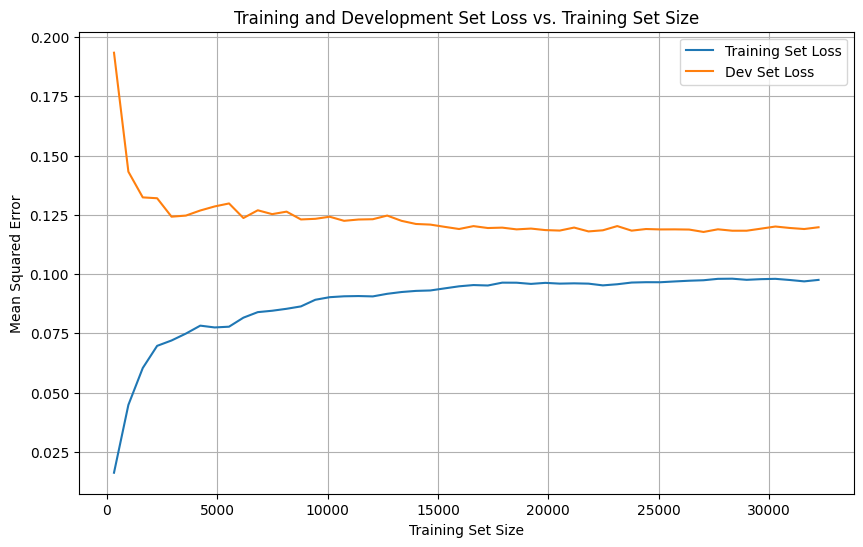

In [46]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = [0.01, 0.02, 0.04, 0.06, 0.1]  # Different sizes, from 1% to 10% of the data
train_sizes = np.linspace(0.001, 0.1, 50)
# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model.predict(X_train_subset)
    y_dev_pred = model.predict(X_dev)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_squared_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [ ]:
y_test_pred = model.predict(X_test)
error = mean_absolute_error(y_test, y_test_pred)
print(error)

0.25180144106202623


In [43]:
new_data = X_test[:5]
true_value = y_test[:5]
prediction = model.predict(new_data)
error = mean_absolute_error(true_value, prediction)
print(prediction)
print(true_value)
print(error)

[0.42762814 1.02642466 0.42373311 0.35871179 1.05501494]
134067    0.386129
104883    0.484609
99085     0.509759
237984    0.210127
13090     1.798417
Name: CO2_uptake_P0.15bar_T298K[mmol/g], dtype: float64
0.3122655069804512
